In [705]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import folium
import seaborn as sns
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import numpy as np

In [706]:
df= pd.read_csv('my_data_selection.csv', header=0, sep=',', quotechar='"')

# 1. First I explored the data

In [707]:
df.columns

Index(['Country or Area', 'Commodity - Transaction', 'Year', 'Unit',
       'Quantity', 'Quantity Footnotes'],
      dtype='object')

In [708]:
df.info

<bound method DataFrame.info of        Country or Area         Commodity - Transaction    Year  \
0          Afghanistan  Electricity - Gross production  2021.0   
1          Afghanistan  Electricity - Gross production  2020.0   
2          Afghanistan  Electricity - Gross production  2019.0   
3          Afghanistan  Electricity - Gross production  2018.0   
4          Afghanistan  Electricity - Gross production  2017.0   
...                ...                             ...     ...   
99997    Liechtenstein  Electricity - Gross production  2016.0   
99998    Liechtenstein  Electricity - Gross production  2015.0   
99999    Liechtenstein  Electricity - Gross production  2014.0   
100000         fnSeqID                        Footnote     NaN   
100001               1                        Estimate     NaN   

                           Unit  Quantity  Quantity Footnotes  
0       Kilowatt-hours, million   1392.00                 1.0  
1       Kilowatt-hours, million   1336.88      

In [709]:
df.shape

(100002, 6)

In [710]:
df.describe

<bound method NDFrame.describe of        Country or Area         Commodity - Transaction    Year  \
0          Afghanistan  Electricity - Gross production  2021.0   
1          Afghanistan  Electricity - Gross production  2020.0   
2          Afghanistan  Electricity - Gross production  2019.0   
3          Afghanistan  Electricity - Gross production  2018.0   
4          Afghanistan  Electricity - Gross production  2017.0   
...                ...                             ...     ...   
99997    Liechtenstein  Electricity - Gross production  2016.0   
99998    Liechtenstein  Electricity - Gross production  2015.0   
99999    Liechtenstein  Electricity - Gross production  2014.0   
100000         fnSeqID                        Footnote     NaN   
100001               1                        Estimate     NaN   

                           Unit  Quantity  Quantity Footnotes  
0       Kilowatt-hours, million   1392.00                 1.0  
1       Kilowatt-hours, million   1336.88    

### Findings: 
#### So the data measures by country different types of energy products and the flow of that energy product seperated by country or geographic area. After reading about the statistics, I thought it would be interesting to look at some trends from these reports over the years. Specifically, I want to know about electricity consumption in Africa Pre, During, and Post COVID. 

# 2. Preprocessing and Cleaning

#### For the purposes of practicing, I downloaded 5 years of data and all of the countries. I import the csv data I dowloaded from the dashboard.

#### In order to isolate the African Countries, I needed to see what the list and their values looked like in the Country column.

In [711]:
pd.unique(df['Country or Area'])

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plur. State of)', 'Bonaire, St Eustatius, Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Rep.', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Czechoslovakia (former)', 'Dem. Rep. of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',

In [712]:
africa= ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Rep.', 'Chad', 'Comoros', 'Dem. Rep. of the Congo', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

#### Dataframe only including Africa

In [713]:
africa_data=df[df['Country or Area'].isin(africa)]

In [714]:
pd.unique(africa_data['Country or Area'])

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros',
       'Congo', "Côte d'Ivoire", 'Dem. Rep. of the Congo', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Libya'], dtype=object)

#### Pre, During, and Post COVID 2019, 2020, 2021

In [715]:
africa_data= africa_data[africa_data['Year']>= 2019.00]

In [716]:
pd.unique(africa_data['Year'])

array([2020., 2019., 2021.])

#### Null Values

#### I am going to drop the quantity footnotes column. There's a lot of nulls and there's not much analysis I want to do with the footnotes.

In [717]:
africa_data = africa_data.copy()
africa_data= africa_data.drop('Quantity Footnotes', axis=1)
africa_data.columns

Index(['Country or Area', 'Commodity - Transaction', 'Year', 'Unit',
       'Quantity'],
      dtype='object')

#### Next I will check for more rows with null values. Since the UN Data is relatively clean, I do not have to find and replace other forms of null values.

In [718]:
africa_data.isnull().any()

Country or Area            False
Commodity - Transaction    False
Year                       False
Unit                       False
Quantity                   False
dtype: bool

#### Outliers

#### Next I am going to get basic stats so I can see outliers. First, I want to find the unique values in Commodity Transactions. Then I will group by year and types and get the basic stats on each in order to look for outliers or have then in mind when I make my visuals.

In [719]:
africa_data.groupby(['Commodity - Transaction', 'Year'])['Quantity'].describe()

count         mean  \
Commodity - Transaction                            Year                         
Electricity - Consumption by chemical and petro... 2019.0    6.0   315.962667   
                                                   2020.0    6.0   293.882667   
                                                   2021.0    1.0   156.788000   
Electricity - Consumption by commercial and pub... 2019.0   21.0  2688.908762   
                                                   2020.0   22.0  2669.617000   
...                                                          ...          ...   
Solar – Main activity                              2020.0   20.0   272.888000   
                                                   2021.0    9.0    23.092778   
Wind – Main activity                               2019.0    7.0   874.593857   
                                                   2020.0    7.0   884.481857   
                                                   2021.0    2.0     4.550000   

                                                                   std  \
Commodity - Transaction                            Year                  
Electricity - Consumption by chemical and petro... 2019.0   675.511821   
                                                   2020.0   615.293053   
                                                   2021.0          NaN   
Electricity - Consumption by commercial and pub... 2019.0  8595.769976   
                                                   2020.0  8072.628781   
...                                                                ...   
Solar – Main activity                              2020.0   989.346664   
                                                   2021.0    41.576668   
Wind – Main activity                               2019.0  1379.203894   
                                                   2020.0  1559.100989   
                                                   2021.0     6.293250   

                                                               min       25%  \
Commodity - Transaction                            Year                        
Electricity - Consumption by chemical and petro... 2019.0    1.278    7.4055   
                                                   2020.0    1.284    7.4290   
                                                   2021.0  156.788  156.7880   
Electricity - Consumption by commercial and pub... 2019.0   12.000  216.3600   
                                                   2020.0    8.200  222.0950   
...                                                            ...       ...   
Solar – Main activity                              2020.0    0.430    5.5655   
                                                   2021.0    0.022    0.6000   
Wind – Main activity                               2019.0    0.100    5.5000   
                                                   2020.0    0.100    4.8505   
                                                   2021.0    0.100    2.3250   

                                                                50%  \
Commodity - Transaction                            Year               
Electricity - Consumption by chemical and petro... 2019.0   42.3385   
                                                   2020.0   41.5575   
                                                   2021.0  156.7880   
Electricity - Consumption by commercial and pub... 2019.0  506.4720   
                                                   2020.0  562.8025   
...                                                             ...   
Solar – Main activity                              2020.0   11.8690   
                                                   2021.0    3.5720   
Wind – Main activity                               2019.0   11.6900   
                                                   2020.0    9.0000   
                                                   2021.0    4.5500   

                                                                  75%  \
Comm

#### It is hard to see outliers from the stats above. I will not remove the outliers because the numbers could be expected to fluctation highly based on the country's size and economy. 

#### Structure

In [720]:
pd.unique(africa_data['Unit'])

array(['Kilowatt-hours, million'], dtype=object)

#### Since there is one type of unit I will note that it is Kilowatt-hours, million and drop that column.

In [721]:
africa_data= africa_data.drop('Unit', axis=1)

In [722]:
africa_data.columns

Index(['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity'], dtype='object')

#### Next I want to see the different values in the Commodity - Transactions column.

In [723]:
pd.unique(africa_data['Commodity - Transaction'])

array(['Electricity - Gross production',
       'From combustible fuels – Main activity',
       'From combustible fuels – Main activity – Electricity plants',
       'Hydro – Main activity', 'Solar – Main activity',
       'Solar photovoltaic – Main activity', 'Wind – Main activity',
       'From combustible fuels – Autoproducer',
       'From combustible fuels – Autoproducer – Electricity plants',
       'Electricity - net production', 'Electricity - imports',
       'Electricity - exports', 'Electricity - Energy industries own use',
       'Electricity - Own use by oil and gas extraction',
       'Electricity - Own use by oil refineries',
       'Electricity - Own use by electricity, heat and CHP plants',
       'Electricity - Own use by LNG/regasification plants',
       'Electricity - Losses', 'Electricity - Final energy consumption',
       'Electricity - Consumption by manufacturing, construction and non-fuel industry',
       'Electricity - Consumption by iron and steel',
     

#### Duplicates

In [724]:
africa_data= africa_data.drop_duplicates()

#### Data Types

#### Convert the year column from float to int64.

In [725]:
africa_data['Year'] = pd.to_datetime(africa_data['Year'], format='%Y')

In [726]:
africa_data['Year'] = africa_data['Year'].dt.year

In [727]:
type(africa_data['Year'][1476])

numpy.int64

# 3. Visualizations

#### Below I made a heatmap for Gross Electricity Production and Demand in 2019, 2020, 2021. So first, I found all the countries represented by the data. Then I asked ChatGpt to write me a pd series with corresponding lat longs of the center of the countries. I am going to append the lat and longs to the data as a new column. Then I asked ChatGpt for an appropriate lat long for the center of Africa. Then,  I will construct it into HeatMap a heatmap.

In [728]:
pd.unique(africa_data['Country or Area'])

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros',
       'Congo', "Côte d'Ivoire", 'Dem. Rep. of the Congo', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Libya'], dtype=object)

In [729]:
africa_data = africa_data.reset_index().rename(columns={'index': 'id'})

In [730]:
country_lats = {
    'Algeria': 28.0339,
    'Angola': -11.2027,
    'Benin': 9.3077,
    'Botswana': -22.3285,
    'Burkina Faso': 12.2383,
    'Burundi': -3.3731,
    'Cameroon': 7.3697,
    'Central African Rep.': 6.6111,
    'Chad': 15.4542,
    'Comoros': -11.6455,
    'Congo': -0.2280,
    "Côte d'Ivoire": 7.5400,
    'Dem. Rep. of the Congo': -4.0383,
    'Djibouti': 11.8251,
    'Egypt': 26.8206,
    'Equatorial Guinea': 1.6508,
    'Eritrea': 15.1794,
    'Ethiopia': 9.1450,
    'Gabon': -0.8037,
    'Gambia': 13.4432,
    'Ghana': 7.9465,
    'Guinea': 9.9456,
    'Guinea-Bissau': 11.8037,
    'Kenya': -0.0236,
    'Lesotho': -29.6100,
    'Liberia': 6.4281,
    'Libya': 26.3351}

countries = list(country_lats.keys())
latitudes = list(country_lats.values())

country_lats = pd.DataFrame(data={'Country or Area': countries, 'country_lats': latitudes})

In [731]:
country_longs ={
    'Algeria': 1.6596,
    'Angola': 17.8739,
    'Benin': 2.3158,
    'Botswana': 24.6849,
    'Burkina Faso': -1.5616,
    'Burundi': 29.9189,
    'Cameroon': 12.3547,
    'Central African Rep.': 20.9394,
    'Chad': 18.7322,
    'Comoros': 43.3333,
    'Congo': 15.8277,
    "Côte d'Ivoire": -5.5471,
    'Dem. Rep. of the Congo': 21.7587,
    'Djibouti': 42.5903,
    'Egypt': 30.8025,
    'Equatorial Guinea': 10.2679,
    'Eritrea': 39.7823,
    'Ethiopia': 40.4897,
    'Gabon': 11.6094,
    'Gambia': -15.3101,
    'Ghana': -1.0232,
    'Guinea': -9.6966,
    'Guinea-Bissau': -15.1804,
    'Kenya': 37.9062,
    'Lesotho': 28.2336,
    'Liberia': -9.4295,
    'Libya': 17.2283}

countries = list(country_longs.keys())
longitudes = list(country_longs.values())

country_longs = pd.DataFrame(data={'Country or Area': countries, 'country_longs': longitudes})

In [732]:
africa_data = pd.merge(africa_data, country_lats, how='outer', on='Country or Area')
africa_data = pd.merge(africa_data, country_longs, how='left', on='Country or Area')

In [733]:
africa_data

,id,Country or Area,Commodity - Transaction,Year,Quantity,country_lats,country_longs
0,1476,Algeria,Electricity - Gross production,2020,79155.044,28.0339,1.6596
1,1477,Algeria,Electricity - Gross production,2019,81532.740,28.0339,1.6596
2,1507,Algeria,From combustible fuels – Main activity,2020,73115.165,28.0339,1.6596
3,1508,Algeria,From combustible fuels – Main activity,2019,75183.000,28.0339,1.6596
4,1538,Algeria,From combustible fuels – Main activity – Elect...,2020,73115.165,28.0339,1.6596
...,...,...,...,...,...,...,...
1567,99916,Libya,Electricity - Consumption by commercial and pu...,2019,1969.480,26.3351,17.2283
1568,99930,Libya,"Electricity - total production, main activity",2020,29499.011,26.3351,17.2283
1569,99931,Libya,"Electricity - total production, main activity",2019,34628.531,26.3351,17.2283
1570,99961,Libya,Electricity - Gross demand,2020,29922.716,26.3351,17.2283


In [734]:
africa_data.columns

Index(['id', 'Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_lats', 'country_longs'],
      dtype='object')

In [735]:
#Making the dataset for the first HeatMap.
#1. I made an empty dataframe.
heat_map_data2019 = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

#2. I appended the empty dataframe with all rows that were Gross Electricity Production in 2019
for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross production' and row['Year']== 2019:
        heat_map_data2019 = heat_map_data2019.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)


In [736]:
heat_map_data2019

,Country or Area,Commodity - Transaction,Year,Quantity,country_longs,country_lats
0,Algeria,Electricity - Gross production,2019,81532.740,1.6596,28.0339
1,Angola,Electricity - Gross production,2019,15473.829,17.8739,-11.2027
2,Benin,Electricity - Gross production,2019,528.617,2.3158,9.3077
3,Botswana,Electricity - Gross production,2019,2508.096,24.6849,-22.3285
4,Burkina Faso,Electricity - Gross production,2019,752.257,-1.5616,12.2383
5,Burundi,Electricity - Gross production,2019,269.194,29.9189,-3.3731
6,Cameroon,Electricity - Gross production,2019,8476.104,12.3547,7.3697
7,Central African Rep.,Electricity - Gross production,2019,149.430,20.9394,6.6111
8,Chad,Electricity - Gross production,2019,317.000,18.7322,15.4542
9,Comoros,Electricity - Gross production,2019,108.400,43.3333,-11.6455


In [743]:
#I repeated the process for the rest of the years and demand vs production
heat_map_data2020 = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross production' and row['Year']== 2020:
        heat_map_data2020 = heat_map_data2020.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)


In [744]:
heat_map_data2021 = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross production' and row['Year']== 2021:
        heat_map_data2021 = heat_map_data2021.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

In [745]:
heat_map_data2019b = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross demand' and row['Year']== 2019:
        heat_map_data2019b = heat_map_data2019b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

In [746]:
heat_map_data2020b = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross demand' and row['Year']== 2020:
        heat_map_data2020b = heat_map_data2020b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

In [747]:
heat_map_data2021b = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross demand' and row['Year']== 2021:
        heat_map_data2021b = heat_map_data2021b.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

## Geographic Interactive Heatmap of Electricity Demand and Production 2019, 2020, and 2021

In [749]:
main_map = folium.Map(location=[7.1881, 21.0938], zoom_start=3)

heat_map_2019 = folium.FeatureGroup(name='2019 Production Heatmap')
heat_map_2019.add_child(folium.plugins.HeatMap(
    data=heat_map_data2019[['country_lats', 'country_longs', 'Quantity']].values,
    gradient=gradient,
    min_opacity=0.2))
heat_map_2020 = folium.FeatureGroup(name='2020 Production Heatmap')
heat_map_2020.add_child(folium.plugins.HeatMap(
    data=heat_map_data2020[['country_lats', 'country_longs', 'Quantity']].values,
    gradient=gradient,
    min_opacity=0.2))
heat_map_2021 = folium.FeatureGroup(name='2021 Production Heatmap')
heat_map_2021.add_child(folium.plugins.HeatMap(
    data=heat_map_data2021[['country_lats', 'country_longs', 'Quantity']].values,
    gradient=gradient,
    min_opacity=0.2))
heat_map_2019b = folium.FeatureGroup(name='2019 Demand Heatmap')
heat_map_2019b.add_child(folium.plugins.HeatMap(
    data=heat_map_data2019b[['country_lats', 'country_longs', 'Quantity']].values,
    gradient=gradient,
    min_opacity=0.2))
heat_map_2020b = folium.FeatureGroup(name='2020 Demand Heatmap')
heat_map_2020b.add_child(folium.plugins.HeatMap(
    data=heat_map_data2020b[['country_lats', 'country_longs', 'Quantity']].values,
    gradient=gradient,
    min_opacity=0.2))
heat_map_2021b = folium.FeatureGroup(name='2021 Demand Heatmap')
heat_map_2021b.add_child(folium.plugins.HeatMap(
    data=heat_map_data2021b[['country_lats', 'country_longs', 'Quantity']].values,
    gradient=gradient,
    min_opacity=0.2))

# Add the FeatureGroups as layers to the main map
main_map.add_child(heat_map_2019)
main_map.add_child(heat_map_2020)
main_map.add_child(heat_map_2021)
main_map.add_child(heat_map_2019b)
main_map.add_child(heat_map_2020b)
main_map.add_child(heat_map_2021b)

# Add a layer control to the main map
folium.LayerControl().add_to(main_map)

# Display the main map
main_map


### Findings
#### - From 2020-2021, Ghana's Demand and Production rose astronomically
#### - Egypt isn't represented in the 2021 Demand
#### - There's a large portion of Africa without any reported statistics

## Country by Country Comparison of Deficit and Surplus of Gross Electricity in Africa- Pre, During, and Post COVID

In [750]:
#Initializing an empty dataframe for the demand data
demand_data = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])
#Iterating over the dataframe to append a row if it is gross electricity demand
for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross demand':
        demand_data = demand_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

In [751]:
#Here I repeated the process above for the production data
production_data = pd.DataFrame(columns=['Country or Area', 'Commodity - Transaction', 'Year', 'Quantity',
       'country_longs', 'country_lats'])

for index, row in africa_data.iterrows():
    if row['Commodity - Transaction'] == 'Electricity - Gross production':
        production_data = production_data.append({'Country or Area': row['Country or Area'], 'Commodity - Transaction':row['Commodity - Transaction'], 'Year':row['Year'], 'Quantity': row['Quantity'], 'country_longs': row['country_longs'], 'country_lats': row['country_lats']}, ignore_index=True)

In [752]:
#I made a new df of points I wanted to plot. I copied Countries and the Year.
plot_data = demand_data[['Country or Area', 'Year']].copy()
#I subtracted the Gross Production from the Gross Demand of Electricty in order to see deficits and surplus.
#I appended that to a new column in the Plot Data that was "Difference".
plot_data['Difference'] = demand_data['Quantity'] - production_data['Quantity']
plot_data

,Country or Area,Year,Difference
0,Algeria,2020,-8998.791
1,Algeria,2019,-8340.740
2,Angola,2020,-405.000
3,Angola,2019,-399.883
4,Benin,2020,644.164
...,...,...,...
64,Liberia,2021,10.345
65,Liberia,2020,10.000
66,Liberia,2019,10.000
67,Libya,2020,423.705


In [753]:
years = sorted(list(africa_data['Year'].unique()))
print(years)

[2019, 2020, 2021]


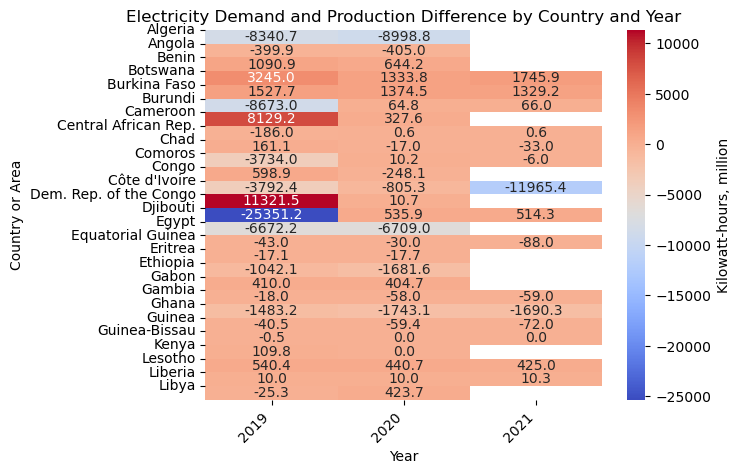

In [755]:
# Create a pivot table to aggregate the data by country and year
pivot_data = pd.pivot_table(plot_data, values='Difference', index=['Country or Area'], columns=['Year'])

# Create the heat map using seaborn
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Kilowatt-hours, million'})

# Add title and axis labels
plt.title('Electricity Demand and Production Difference by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country or Area')

#Set the y labels so all the countries are displayed
plt.yticks(np.arange(len(pivot_data.index)), pivot_data.index)
# Rotate x tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Findings
#### -  Not all countries had data from each year. However, the capacity and infrastructure to report such statistics might be positively correlated with the development of the country
#### - The numbers from year to year fluctuate wildly for most of the countries
#### - Cameroon, Comoros, Cote d Iviore, Djibouti, Egypt, Equatorial Guinea, Gabon, Guinea-Bissau, Lesotho, Libya all experienced an increase in preformance from 2019-2020, the rest of the nation's experienced a decrease in preformance

## Country with the Min and Max Quantities

In [632]:
# Group by energy sector and year, and find the min and max quantities
grouped_data = africa_data.groupby(['Commodity - Transaction'])['Quantity']
min_c = grouped_data.idxmin().apply(lambda x: africa_data.loc[x]['Country or Area'])
max_c = grouped_data.idxmax().apply(lambda x: africa_data.loc[x]['Country or Area'])
# Combine the min and max countries into a new dataframe
min_max_countries = pd.DataFrame({'Min Country': min_c, 'Max Country': max_c})


In [633]:
min_max_countries

,Min Country,Max Country
Commodity - Transaction,,
Electricity - Consumption by chemical and petrochemical,Benin,Algeria
Electricity - Consumption by commercial and public services,Guinea-Bissau,Egypt
Electricity - Consumption by construction,Ghana,Algeria
Electricity - Consumption by food and tobacco,Lesotho,Algeria
Electricity - Consumption by households,Guinea-Bissau,Egypt
Electricity - Consumption by iron and steel,Botswana,Algeria
Electricity - Consumption by machinery,Benin,Benin
"Electricity - Consumption by manufacturing, construction and non-fuel industry",Guinea-Bissau,Egypt
Electricity - Consumption by mining and quarrying,Gabon,Dem. Rep. of the Congo


In [634]:
#Next I will count the instances of each count for each country for Min and Max
min_tally = min_max_countries['Min Country'].value_counts().to_dict()
min_tally = pd.DataFrame({'Min Country': list(min_tally.keys()), 'Instances': list(min_tally.values())})
min_tally

,Min Country,Instances
0,Guinea-Bissau,9
1,Benin,6
2,Lesotho,5
3,Botswana,5
4,Gabon,4
5,Ghana,3
6,Kenya,3
7,Côte d'Ivoire,3
8,Burundi,3
9,Liberia,2


## African Nations with Smaller Energy Sectors

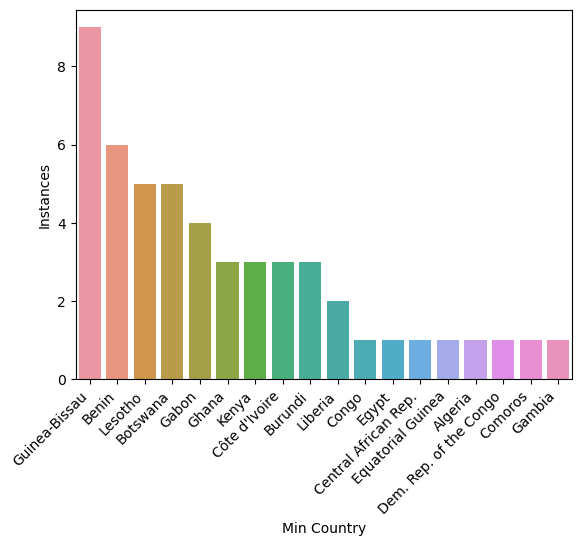

In [639]:
min_plot= sns.barplot(data= min_tally, x='Min Country', y='Instances')
min_plot.set_xticklabels(min_plot.get_xticklabels(), rotation=45, ha="right", fontsize=10)
plt.show()

In [635]:
max_tally = min_max_countries['Max Country'].value_counts().to_dict()
max_tally = pd.DataFrame({'Max Country': list(max_tally.keys()), 'Instances': list(max_tally.values())})
max_tally

,Max Country,Instances
0,Egypt,24
1,Algeria,14
2,Ghana,3
3,Dem. Rep. of the Congo,2
4,Kenya,2
5,Liberia,2
6,Benin,1
7,Cameroon,1
8,Gabon,1
9,Botswana,1


## Energy Leaders in Africa

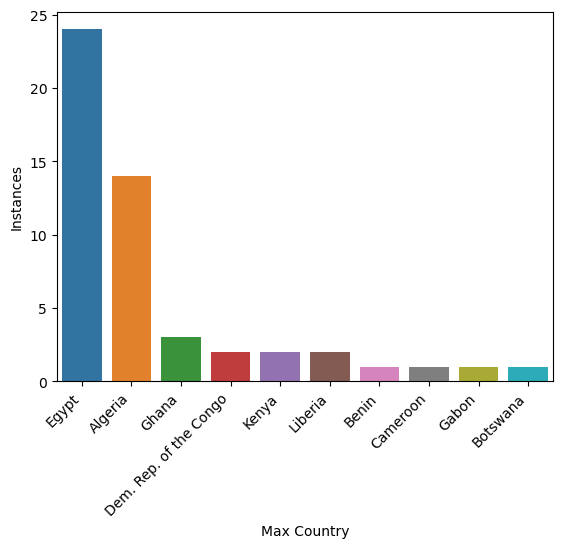

In [637]:
max_plot= sns.barplot(data= max_tally, x='Max Country', y='Instances')
max_plot.set_xticklabels(max_plot.get_xticklabels(), rotation=45, ha="right", fontsize=10)
plt.show()

### Findings
#### - It seems that Egypt is an energy leader in Africa
#### - Of countries with reported statistics, it looks like Guinea-Bissau has the least developed energy sector